<a href="https://colab.research.google.com/github/IsmailHaris/Bitcoin-Prediction/blob/master/Projet_DL_Bitcoin_FinalVersion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Price Prediction using Deep Learning 


In [0]:
%tensorflow_version 2.x
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0

Uninstalling tensorflow-2.2.0rc2:
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 377.0MB 43kB/s 
     |████████████████████████████████| 3.2MB 39.9MB/s 
     |████████████████████████████████| 491kB 40.8MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0


The goal of this work is to use different Deep Learning algorithms to predict the evolution of the Bircoin price. We'll compare the usual ARIMA time series with the Multilayer Perceptron MLP, the LSTM (1 and 2 layers), Multiple 1D CNN, and the GRU (1 and 2 layers). This work is based on a research paper from University of California Berkeley ('A gated recurrent unit approach to Bitcoin Price Prediction) released in December 2019. 

Bitcoin is the first decentralized digital currency. This means it is not governed by any central bank or some other authority. This cryptocurrency was created in 2009 but it became extremely popular in 2017. Some experts call bitcoin "the currency of the future" or even lead it as an example of the social revolution. The bitcoin price has increased several times during the 2017 year. At the same time, it is very volatile. Many economic entities are interested in tools for predicting the bitcoin prices. It is especially important for existing or potential investors and for government structures. The last needs to be ready to significant price movements to prepare a consistent economic policy. So, the demand for Bitcoin price prediction mechanism is high.

# Imports 

The first thing we do is importing all the necessary python libraries.

In [0]:
import pandas as pd
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
import plotly.offline as py
import time
import plotly.graph_objs as go
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from math import sqrt
from random import randint
from keras.layers import GRU
from keras.callbacks import EarlyStopping
from keras import initializers
from keras import regularizers
from matplotlib import pyplot
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import sklearn as sk
sns.set()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
print('Using python {}.{}, with modules versions'.format(sys.version_info.major, sys.version_info.minor))
print('-'*40)
print('numpy == {}'.format(np.__version__))
print('torch == {}'.format(tf.__version__))  

Using python 3.6, with modules versions
----------------------------------------
numpy == 1.18.2
torch == 1.14.0


# Load Dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Bitcoindata.csv to Bitcoindata.csv


In [0]:
data = pd.read_csv("Bitcoindata.csv", sep=';') 
data.head()

,Date,Bitcoin Core (BTC) Price,Money Supply,Price Volatility,Daily Transactions,Block Size,Transaction Fees,Inflation Rate
0,06/02/2011,0.89,5321500.0,164.844710,876,1586,0.178263,174.722
1,07/02/2011,0.89,5330350.0,164.987700,861,1685,0.101126,173.646
2,08/02/2011,0.88,5340500.0,165.328338,888,1316,0.315472,172.767
3,09/02/2011,0.91,5348900.0,164.880682,879,1615,0.177370,171.759
4,10/02/2011,1.03,5358500.0,167.764321,1246,1973,0.065517,171.090


Dataset source : https://charts.bitcoin.com

* Bitcoin Core Price BTC : Bitcoin prices

* Monney Supply : The amount of Bitcoin Core (BTC) in circulation

* Price Volatility : The annualized daily volatility of price changes. Price
volatility is computed as the standard deviation of daily
returns, scaled by the square root of 365 to annualize, and
expressed as a decimal.

* Daily Transactions : The number of transactions included in the blockchain each day

* Block Size : Miners collect Bitcoin Core (BTC) transactions into distinct
packets of data called blocks. Each block is cryptographically
linked to the preceding block, forming a "blockchain." As more
people use the Bitcoin Core (BTC) network for Bitcoin Core
(BTC) transactions, the block size increases

* Transaction Fees : Total amount of Bitcoin Core (BTC) fees earned by all miners in
24-hour period, measured in Bitcoin Core (BTC).

* Inflation rate : The federal funds rate decide the shape of the future interest
rates in the economy.

# Exploratory Data Analysis

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3333 non-null   object 
 1   Bitcoin Core (BTC) Price  3333 non-null   float64
 2   Money Supply              3333 non-null   float64
 3   Price Volatility          3333 non-null   float64
 4   Daily Transactions        3333 non-null   int64  
 5   Block Size                3333 non-null   int64  
 6   Transaction Fees          3333 non-null   float64
 7   Inflation Rate            3333 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 208.4+ KB


Bitcoin price shape through time 

In [0]:
btc_trace = go.Scatter(x=data['Date'], y=data['Bitcoin Core (BTC) Price'], name= 'Price')
py.iplot([btc_trace])

Features correlation

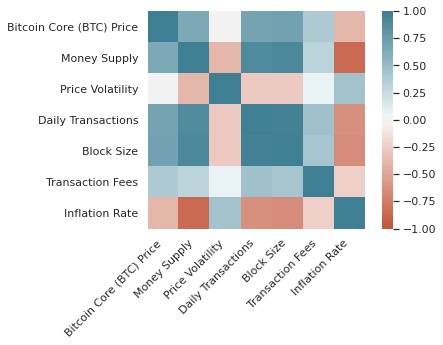

In [0]:
#Let's have a look at the correlation between the features and the Bitcoin price
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Before forecasting time series we want to check if the data is stationary. This means that our data is influenced by such factors as trend or seasonality.
We perform a seasonal decomposition of the data to estimate its trend and seasonality. You can see the actual price movements on the plot below ("observed") as well as the trend and seasonality in our data.

In [0]:
working_data = data.reset_index()
working_data['Date'] = pd.to_datetime(working_data['Date'])
working_data = working_data.set_index('Date')

s = sm.tsa.seasonal_decompose(working_data['Bitcoin Core (BTC) Price'].values, freq=60)

trace1 = go.Scatter(x = np.arange(0, len(s.trend), 1),y = s.trend,mode = 'lines',name = 'Trend',
    line = dict(color = ('rgb(244, 146, 65)'), width = 4))
trace2 = go.Scatter(x = np.arange(0, len(s.seasonal), 1),y = s.seasonal,mode = 'lines',name = 'Seasonal',
    line = dict(color = ('rgb(66, 244, 155)'), width = 2))

trace3 = go.Scatter(x = np.arange(0, len(s.resid), 1),y = s.resid,mode = 'lines',name = 'Residual',
    line = dict(color = ('rgb(209, 244, 66)'), width = 2))

trace4 = go.Scatter(x = np.arange(0, len(s.observed), 1),y = s.observed,mode = 'lines',name = 'Observed',
    line = dict(color = ('rgb(66, 134, 244)'), width = 2))

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Seasonal decomposition', xaxis = dict(title = 'Time'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='seasonal_decomposition')

The next thing we do is the examination of the autocorrelation. It is it is the similarity between observations as a function of the time lag between them. It is important for finding repeating patterns in the data.

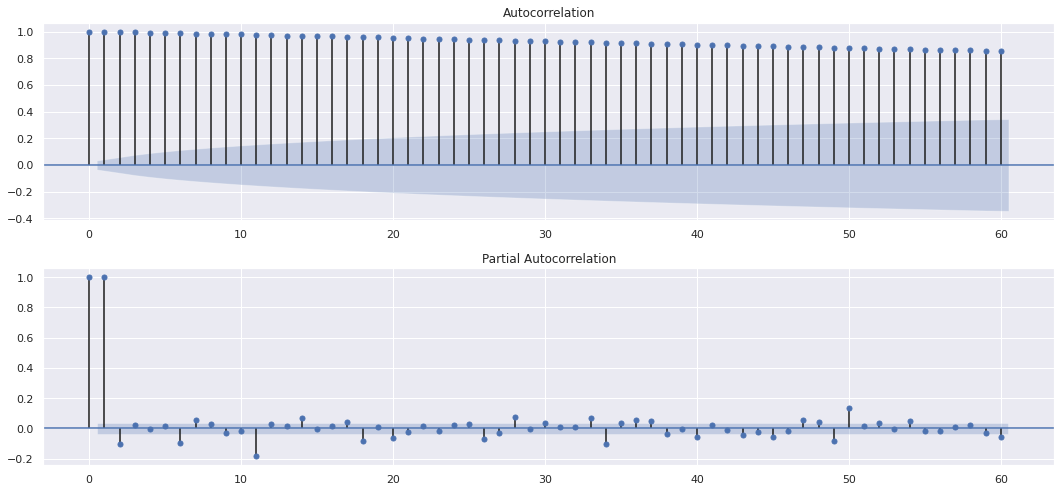

In [0]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(working_data['Bitcoin Core (BTC) Price'].values.squeeze(), lags=60, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(working_data['Bitcoin Core (BTC) Price'].values.squeeze(), lags=60, ax=ax)
plt.tight_layout()
plt.show()

# Preprocessing the data

* There are no NaNs to fill. 
* The feature selection has been done according to the paper and we keep here only the relevant ones
* There are no categorical features to do one hot encoding
* We will divide our dataset into training and test sets
* Training set goes from 06 February 2011 to 30 September 2019
* Test set goes from 25 October 2019 au 22 Mars 2020 ie the 4 last months (150 days approx)

We need to prepare our dataset according to the requirements of the model, as well as to split the dataset into train and test parts. In the next cell, we define a function which creates X inputs and Y labels for our model. In the sequential forecasting, we predict the future value based on some previous and current values. So, our Y label is the value from the next (future) point of time while the X inputs are one or several values from the past. The amount of these values we can set by tuning the parameter look_back in our function. We set it to 30, this means that we predict current value  based on the previous 30 days values (t-1),...(t-30)

Lookback Function

In [0]:
def create_lookback(dataset, look_back=30):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 1:8]
        X.append(a)
        Y.append(dataset[i + look_back, 1])
    return np.array(X), np.array(Y)

Now we : 
* Reshape the train and test datasets according to the requirements of the model.
* Scale the dataset by using the MinMaxScaler because LSTM models are scale sensitive.
* Apply our create_lookback function.

In [0]:
np.shape(working_data)

(3333, 8)

In [0]:

working_data.columns

Index(['index', 'Bitcoin Core (BTC) Price', 'Money Supply', 'Price Volatility',
       'Daily Transactions', 'Block Size', 'Transaction Fees',
       'Inflation Rate'],
      dtype='object')

In [0]:
df_train = working_data[:-150]
df_test = working_data[-150:]
print ( 'len whole dataset : ', len(working_data))
print ( 'len training dataset : ', len(df_train))
print ( 'len test dataset : ', len(df_test))

len whole dataset :  3333
len training dataset :  3183
len test dataset :  150


In [0]:
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 8))
test_set = df_test.values
test_set = np.reshape(test_set, (len(test_set), 8))

X_train = df_train.drop(columns = 'Bitcoin Core (BTC) Price')
Y_train = df_train['Bitcoin Core (BTC) Price']

X_test = df_test.drop(columns = 'Bitcoin Core (BTC) Price')
Y_test = df_test['Bitcoin Core (BTC) Price']

#scale datasets
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

#scale the outputs
Y_train = pd.DataFrame(sk.preprocessing.scale(Y_train, axis=0, with_mean=True, with_std=True))
Y_test = pd.DataFrame(sk.preprocessing.scale(Y_test, axis=0, with_mean=True, with_std=True))

# create datasets which are suitable for time series forecasting
look_back = 30
X_train.insert(value = Y_train.values, column = 'Bitcoin Core (BTC) Price', loc = 1  )
X_test.insert(value = Y_test.values, column = 'Bitcoin Core (BTC) Price', loc = 1  )

training_set_2 = X_train
test_set_2 = X_test

X_train, Y_train = create_lookback(training_set_2.values, look_back)
X_test, Y_test = create_lookback(test_set_2.values, look_back)


 # reshape datasets so that they will be ok for the requirements of the  models in Keras
X_train = np.reshape(X_train, (len(X_train), look_back, X_train.shape[2]))
X_test = np.reshape(X_test, (len(X_test), look_back, X_test.shape[2]))
Y_test = np.reshape(Y_test, (len(Y_test),1))
Y_train = np.reshape(Y_train, (len(Y_train),1))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(3153, 30, 7)
(120, 30, 7)
(3153, 1)
(120, 1)


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3183 entries, 2011-06-02 to 2019-10-24
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     3183 non-null   int64  
 1   Bitcoin Core (BTC) Price  3183 non-null   float64
 2   Money Supply              3183 non-null   float64
 3   Price Volatility          3183 non-null   float64
 4   Daily Transactions        3183 non-null   int64  
 5   Block Size                3183 non-null   int64  
 6   Transaction Fees          3183 non-null   float64
 7   Inflation Rate            3183 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 223.8 KB


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2019-10-25 to 2020-03-22
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     150 non-null    int64  
 1   Bitcoin Core (BTC) Price  150 non-null    float64
 2   Money Supply              150 non-null    float64
 3   Price Volatility          150 non-null    float64
 4   Daily Transactions        150 non-null    int64  
 5   Block Size                150 non-null    int64  
 6   Transaction Fees          150 non-null    float64
 7   Inflation Rate            150 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 10.5 KB


In [0]:
#check the normalisation and the shapes
print(X_train.shape, X_train.mean(), X_train.var())
print(Y_train.shape, Y_train.mean(), Y_train.var())
print(X_test.shape, X_test.mean(), X_test.var())
print(Y_test.shape, Y_test.mean(), Y_test.var())

(3153, 30, 7) 0.2452624400755091 0.22726342299102853
(3153, 1) 0.006013631350452138 1.0056777727049913
(120, 30, 7) 0.37836575139390544 0.2685960800150949
(120, 1) -0.11605416822378466 1.1187571228481417


We use Keras/scikit learn frameworks for deep learning. Our first model consists of MultiLayer Perceptron. 
I will first use the MLP Regressor of scikit learn and then the MLP from Keras. 

The research paper suggest to take 2 hidden layers, of 25 nodes each. They've also taken a tanh activation function, the Adam optimize solver, a batch size of 125, a default adaptive learning rate. 

I will use a gridsearch to determine the optimal parameters because the learning hyper parameters are of extreme importance for efficiency. They have to be optimal. We'll use cross validation because it's a robust method to find optimal hyperparameters. 

Some important points here : 


* For max_iter, which is the number of training epochs, rather than optimizing it, i prefer to take a large number of epochs (500) and activate the early stopping. If the number of epochs is large, we can fear overfitting, if it's too small, it can not converge. I recall that 1 epoch means that all the training set has been seen once. Iterations means the number of batchs to complete the epoch. 

* The gridsearch will concern the hidden layer number, the hidden layer size, the learing rate init, the momentum and the alpha. 

* The batch size is chosen equal to 125. Shuffing is denied since we work with time series. 

* If the number of hidden layers is too high, we risk overfitting. Generally, one hidden layer is sufficient (Cybenko Theorem)

* For the activation function, I wanted to use the ReLu function because it avoids the gradient vanishing. BUT, the research paper suggests to use tanH because, even if it suffers from gradient vanishing, the second derivative can sustain for a long time before converging to zero, unlike ReLu, which improves the model prediction.

* The initial learning rate always impacts the outcome of the training (too small = training can be stuck in a local minima, too big = may not converge)

* The learning rate is adaptive : ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.



* To avoid this staying stuck in a local minimum, we use a momentum term in the objective function, which is a value between 0 and 1 that increases the size of the steps taken towards the minimum by trying to jump from a local minima. If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step. A small value of momentum cannot reliably avoid local minima, and can also slow down the training of the system. Momentum also helps in smoothing out the variations, if the gradient keeps changing direction. A right value of momentum can be either learned by hit and trial or through cross-validation.

* Alpha corresponds to the L2 regularization of weights.It's a way to avoid overfitting. 



# MLP from Scikit Learn

In [0]:
from sklearn.neural_network import MLPRegressor

#pour les hidden layer, ca me dira combien de neurones dans chaque hidden layer
#La gridsearch a pris tellement de temps que j'ai décidé de réduire le nombre de possibilités pour chaque paramètre  à optimiser sinon cela prend trop de temps
#une premiere gridsearch a été faite avec param_grid : elle etait très chronophage.voir les resultats plus bas
# Je prend un nombre de fold égale à 5 pour la cross validation
param_grid = [
  {'hidden_layer_sizes': [ (10,10), (20,20), (25,25), (50,50), (100,100), (256,256)], 
   'learning_rate_init':[0.0001, 0.001, 0.01, 0.1],
   'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'momentum': [0.1, 0.5, 0.99]
 }]


print(param_grid)



[{'hidden_layer_sizes': [(10, 10), (20, 20), (25, 25), (50, 50), (100, 100), (256, 256)], 'learning_rate_init': [0.0001, 0.001, 0.01, 0.1], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1], 'momentum': [0.1, 0.5, 0.99]}]


In [0]:
# Cross-validation (3 folds) grid-search (the scoring is taken to be the root mean squared error)

from sklearn.model_selection import GridSearchCV
mlp = GridSearchCV(MLPRegressor(hidden_layer_sizes=(1, ), activation='tanh', solver='adam', 
                    alpha=0.0001, batch_size=125, learning_rate='adaptive', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=5000, shuffle=False, random_state=11, tol=0.000001, 
                    verbose=True, warm_start=False, momentum=0.5, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08), param_grid, cv=5, scoring='neg_root_mean_squared_error')
print(mlp)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='tanh', alpha=0.0001,
                                    batch_size=125, beta_1=0.9, beta_2=0.999,
                                    early_stopping=True, epsilon=1e-08,
                                    hidden_layer_sizes=(1,),
                                    learning_rate='adaptive',
                                    learning_rate_init=0.005, max_fun=15000,
                                    max_iter=5000, momentum=0.5,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=11, sh...
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'hidden_layer_sizes': [(10, 10), (20, 20), (25, 25),
                                          

Important : The Gridsearch took so much time that I will not run it here, i did it separately, I will show only the optimal parameters given by the gridsearch (which are basically according to those of the research paper). 
The codes for the gridsearch are available here, but i don't run them. 

In [0]:
#mlp.fit(x_train, y_train)
#print("Best parameters set found on development set:")
#print()
#print(mlp.best_params_)
#print()

In [0]:
#mlp.best_estimator_

In [0]:
mlp_optimal = MLPRegressor(hidden_layer_sizes=(25,1), activation='tanh', solver='adam', 
                    alpha =1e-02, batch_size=100, learning_rate='adaptive', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=5000, shuffle=True, random_state=11, tol=0.000001, 
                    verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                    early_stopping=True,  validation_fraction=0.05, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp_optimal)

MLPRegressor(activation='tanh', alpha=0.01, batch_size=100, beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(25, 1), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=5000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=11, shuffle=True, solver='adam',
             tol=1e-06, validation_fraction=0.05, verbose=True,
             warm_start=False)


The X_train and Y_train defined above are in a shape according to keras input. 
I will here redo the work (preprocess) with x_train and y_train to use them for the MLP of scikit learn

In [0]:
x_train = df_train.drop(columns = 'Bitcoin Core (BTC) Price')
y_train = df_train['Bitcoin Core (BTC) Price']

x_test = df_test.drop(columns = 'Bitcoin Core (BTC) Price')
y_test = df_test['Bitcoin Core (BTC) Price']

#scale datasets
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

#scale the outputs
y_train = pd.DataFrame(sk.preprocessing.scale(y_train, axis=0, with_mean=True, with_std=True))
y_test = pd.DataFrame(sk.preprocessing.scale(y_test, axis=0, with_mean=True, with_std=True))

# create datasets which are suitable for time series forecasting
look_back = 30
x_train.insert(value = y_train.values, column = 'Bitcoin Core (BTC) Price', loc = 1  )
x_test.insert(value = y_test.values, column = 'Bitcoin Core (BTC) Price', loc = 1  )

training_set_3 = x_train
test_set_3 = x_test


x_train,y_train_ = create_lookback(training_set_3.values, look_back)
x_test, y_test_ = create_lookback(test_set_3.values, look_back)

y_test = np.reshape(y_test_, (len(y_test_),1))
y_train = np.reshape(y_train_, (len(y_train_),1))


x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)



print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3153, 210)
(120, 210)
(3153, 1)
(120, 1)


In [0]:
start = time.time()
mlp_optimal.fit(x_train, y_train)
end = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Iteration 1, loss = 0.45134483
Validation score: 0.080911
Iteration 2, loss = 0.41434398
Validation score: 0.139479
Iteration 3, loss = 0.38887093
Validation score: 0.190272
Iteration 4, loss = 0.36681624
Validation score: 0.236928
Iteration 5, loss = 0.34614885
Validation score: 0.279886
Iteration 6, loss = 0.32721040
Validation score: 0.320946
Iteration 7, loss = 0.30921854
Validation score: 0.358596
Iteration 8, loss = 0.29268784
Validation score: 0.394840
Iteration 9, loss = 0.27688669
Validation score: 0.428116
Iteration 10, loss = 0.26236595
Validation score: 0.460212
Iteration 11, loss = 0.24860477
Validation score: 0.489467
Iteration 12, loss = 0.23585766
Validation score: 0.516821
Iteration 13, loss = 0.22383192
Validation score: 0.543146
Iteration 14, loss = 0.21265514
Validation score: 0.567662
Iteration 15, loss = 0.20211991
Validation score: 0.590541
Iteration 16, loss = 0.19202759
Validation score: 0.611562
Iteration 17, loss = 0.18273545
Validation score: 0.632464
Iterat

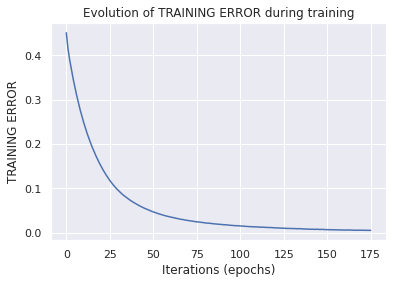

 MSE MLP (on test set) =  0.21265707009349819
time_mlp_skl : 5.048307 sec 


In [0]:
# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot( mlp_optimal.loss_curve_)
plt.show()

# Evaluate acuracy on validation data
score_mlp = mlp_optimal.score(x_test,y_test)
y_pred_mlp = mlp_optimal.predict(x_test)
from sklearn.metrics import mean_squared_error
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
#print(" Score R^2 (on test set) = ", score_mlp)
print(" MSE MLP (on test set) = ", mse_mlp)
time_mlp_skl = end - start
print("time_mlp_skl : %f sec " %(time_mlp_skl))

In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(y_pred_mlp), 1),
    y = y_pred_mlp[1:,],
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(y_test), 1),
    y = y_test[:,0],
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

# MLP on Keras 

How to Tune Batch Size, number of neurons, the optimizer, the dropout_rate, activation function, learn_rate, momentum and Number of Epochs? 


Gridsearch for all. 
Epochs : I choose a big Epochs number and do early stopping. 


In [0]:
'''# Use scikit-learn to grid search the batch size 
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
# Function to create model, required for KerasRegressor
def create_model(neurons=1, neurons_2 = 1, dropout_rate=0.0, activation='relu', learn_rate=0.01, momentum=0, optimizer='adam'):
  # create model
  model = Sequential()
  model.add(Dense(neurons, activation=activation,  input_shape = (mlp_train[0].shape)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(neurons_2, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(hidden_size,kernel_regularizer= regularizers.l2(weight_penalty)))
  # Compile model
  optimizer = optimizer (lr=learn_rate, momentum=momentum)
  model.compile(loss='mean_squared_error', optimizer=optimizer)
  return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model_mlp_grid = KerasRegressor(build_fn=create_model, epochs=2, verbose=0)
# define the grid search parameters
neurons = [10,  25, 50, 100, 256]
neurons_2 = [10,  25, 50, 100, 256]
batch_size = [100,125,150,200]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.1, 0.5, 0.9]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(batch_size=batch_size, neurons=neurons, neurons_2 = neurons_2, optimizer=optimizer,dropout_rate=dropout_rate, activation=activation, learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model_mlp_grid, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(mlp_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''

'# Use scikit-learn to grid search the batch size \nimport numpy\nfrom sklearn.model_selection import GridSearchCV\nfrom keras.wrappers.scikit_learn import KerasRegressor\n# Function to create model, required for KerasRegressor\ndef create_model(neurons=1, neurons_2 = 1, dropout_rate=0.0, activation=\'relu\', learn_rate=0.01, momentum=0, optimizer=\'adam\'):\n  # create model\n  model = Sequential()\n  model.add(Dense(neurons, activation=activation,  input_shape = (mlp_train[0].shape)))\n  model.add(Dropout(dropout_rate))\n  model.add(Dense(neurons_2, activation=activation))\n  model.add(Dropout(dropout_rate))\n  model.add(Dense(hidden_size,kernel_regularizer= regularizers.l2(weight_penalty)))\n  # Compile model\n  optimizer = optimizer (lr=learn_rate, momentum=momentum)\n  model.compile(loss=\'mean_squared_error\', optimizer=optimizer)\n  return model\n# fix random seed for reproducibility\nseed = 7\nnumpy.random.seed(seed)\n# create model\nmodel_mlp_grid = KerasRegressor(build_fn=cre

In [0]:
# --------------------------------------
# Network params
# --------------------------------------
# Network params
batch = 125   # in each iteration, we consider 125 training examples at once
epochs = 500    # we iterate 500 times maximum over the entire training set
drop_prob = 0.1 # dropout with probability 0.1
hidden_size = 1  # the Fully connected layer will have 1 neuron
weight_penalty = 0.1 # Factor for weights penalty
learning_rate = 0.001 


In [0]:
mlp_train = X_train.reshape(X_train.shape[0],-1)
mlp_test = X_test.reshape(X_test.shape[0],-1)


In [0]:
# --------------------------------------
# MLP network definition
# --------------------------------------

# initialize sequential model, add 2 stacked dense layers and densely connected output neuron
model = Sequential()


# Dense [25]  (with dropout)
model.add(Dense(25, activation='tanh', kernel_regularizer= regularizers.l2(weight_penalty), input_shape = (mlp_train[0].shape)))
model.add(Dropout(drop_prob))

# Dense [1] (with dropout)
model.add(Dense(hidden_size))


        
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                5275      
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# --------------------------------------
# Loss function and Optimizer
# --------------------------------------
from keras.optimizers import Adam
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', # using MSE
              optimizer=optimizer, # using the Adam optimiser
              ) 

# --------------------------------------
# Training
# --------------------------------------
start = time.time()
history = model.fit(x_train, y_train, 
                    batch_size=batch, nb_epoch=epochs,
                    shuffle=True, 
                    validation_split = 0.05,#validate on 5 months approx
                   callbacks = [EarlyStopping(monitor='val_loss',  patience=20, verbose = 1)])
end = time.time()
                    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.




Train on 2995 samples, validate on 158 samples
Epoch 1/500
2995/2995 [==============================] - 1s 472us/step - loss: 4.7057 - val_loss: 3.6615
Epoch 2/500
2995/2995 [==============================] - 0s 22us/step - loss: 3.1776 - val_loss: 2.7032
Epoch 3/500
2995/2995 [==============================] - 0s 24us/step - loss: 2.3004 - val_loss: 1.9652
Epoch 4/500
2995/2995 [==============================] - 0s 21us/step - loss: 1.6471 - val_loss: 1.3938
Epoch 5/500
2995/2995 [==============================] - 0s 22us/step - loss: 1.1805 - val_loss: 1.0189
Epoch 6/500
2995/2995 [==============================] - 0s 22us/step - loss: 0.8456 - val_loss: 0.7421
Epoch 7/500
2995/2995 [==============================] - 0s 24us/step - loss: 0.6186 - val_loss: 0.5555
Epoch 8/500
2995/2995 [==============================] - 0s 23us/step - loss: 0.4566 - val_loss: 0.4276
Epoch 9/500
2995/2995 [==============================] - 0s 22us/step - loss: 0.3432 - val_loss: 0.3190
Epoch 10/500
29

In [0]:
# get predictions and then make some transformations to be able to calculate MSE properly in USD
prediction = model.predict(x_test)
print(prediction.shape)
print(y_test.shape)


(120, 1)
(120, 1)


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(prediction), 1),
    y = prediction[1:,0],
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(y_test), 1),
    y = y_test[:,0],
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [0]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

In [0]:
mse_mlp_keras = mean_squared_error(y_test, prediction)
print(" MSE MLP Keras (on test set) = ", mse_mlp_keras)
time_mlp_keras = end - start
print("time_mlp_keras : %f sec " %(time_mlp_keras))

 MSE MLP Keras (on test set) =  0.1702090687134538
time_mlp_keras : 13.805968 sec 


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='training_process')

LSTM Neural Network

In [0]:
# --------------------------------------
# Network params
# --------------------------------------
# Network params
batch = 100   # in each iteration, we consider 125 training examples at once
epochs = 500    # we iterate 20 times over the entire training set
drop_prob = 0 # dropout with probability 0.1
hidden_size = 1  # the Fully connected layer will have 1 neuron
weight_penalty = 0.0001 # Factor for weights penalty
learning_rate = 0.001

In [0]:
# --------------------------------------
# LSTM network definition
# --------------------------------------

# initialize sequential model, add 2 stacked dense layers and densely connected output neuron
model = Sequential()

# LSTM [50]  (with dropout)
model.add(LSTM(50, activation='tanh', return_sequences=False,dropout= drop_prob, input_shape = (X_train.shape[1], X_train.shape[2])))

# Dense [1] 
model.add(Dense(hidden_size,kernel_regularizer= regularizers.l2(weight_penalty)))

          
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                11600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 11,651
Trainable params: 11,651
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# --------------------------------------
# Loss function and Optimizer
# --------------------------------------
from keras.optimizers import Adam
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', # using MSE
              optimizer=optimizer, # using the Adam optimiser
              ) 

# --------------------------------------
# Training
# --------------------------------------
start = time.time()
history = model.fit(X_train, Y_train, 
                    batch_size=batch, nb_epoch=epochs,
                    shuffle=False, 
                    validation_split = 0.05,
                    use_multiprocessing = True,
                   callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose = 1)])
end = time.time()
                    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 2995 samples, validate on 158 samples
Epoch 1/500
2995/2995 [==============================] - 1s 368us/step - loss: 0.4750 - val_loss: 1.6404
Epoch 2/500
2995/2995 [==============================] - 1s 272us/step - loss: 0.1194 - val_loss: 0.1533
Epoch 3/500
2995/2995 [==============================] - 1s 264us/step - loss: 0.1452 - val_loss: 0.0741
Epoch 4/500
2995/2995 [==============================] - 1s 268us/step - loss: 0.1239 - val_loss: 0.0922
Epoch 5/500
2995/2995 [==============================] - 1s 278us/step - loss: 0.1788 - val_loss: 0.7536
Epoch 6/500
2995/2995 [==============================] - 1s 274us/step - loss: 0.0538 - val_loss: 0.1019
Epoch 7/500
2995/2995 [==============================] - 1s 276us/step - loss: 0.0328 - val_loss: 0.0520
Epoch 8/500
2995/2995 [==============================] - 1s 273us/step - loss: 0.0233 - val_loss: 0.0422
Epoch 9/500
2995/2995 [==============================] - 1s 269us/step - loss: 0.0178 - val_loss: 0.0411
Epoch 10

In [0]:
# get predictions and then make some transformations to be able to calculate MSE properly in USD
prediction = model.predict(X_test)
print(prediction.shape)
print(Y_test.shape)


(120, 1)
(120, 1)


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(prediction), 1),
    y = prediction[1:,0],
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(Y_test), 1),
    y = Y_test[:,0],
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [0]:
mse_lstm = mean_squared_error(Y_test, prediction)
print(" MSE LSTM (on test set) = ", mse_lstm)
time_lstm = end - start
print("time_lstm : %f sec " %(time_lstm))

 MSE LSTM (on test set) =  0.14261934988836966
time_lstm : 170.219450 sec 


In [0]:

trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='training_process')

GRU with reccurent dropout Neural Network

In [0]:
# --------------------------------------
# Network params
# --------------------------------------
# Network params
batch = 100   # in each iteration, we consider 125 training examples at once
epochs = 500    # we iterate 20 times over the entire training set
drop_prob = 0.01 # dropout with probability 0.01 #approx 1 months ( knowing that 2 years are really relevant (2017-2019))
hidden_size = 1  # the Fully connected layer will have 1 neuron
weight_penalty = 0.0001 # Factor for weights penalty

In [0]:
# --------------------------------------
# GRU network definition
# --------------------------------------

# initialize sequential model, add 2 stacked dense layers and densely connected output neuron
model = Sequential()


# GRU [50]  (with dropout)
model.add(GRU(50, activation='tanh', return_sequences=False, dropout= drop_prob, recurrent_dropout=drop_prob  ,input_shape = (X_train.shape[1], X_train.shape[2]), kernel_regularizer= regularizers.l2(weight_penalty)))

# Dense [1] 
model.add(Dense(hidden_size,kernel_regularizer= regularizers.l2(weight_penalty)))

          
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50)                8700      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 8,751
Trainable params: 8,751
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# --------------------------------------
# Loss function and Optimizer
# --------------------------------------
from keras.optimizers import Adam
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', # using MSE
              optimizer=optimizer, # using the Adam optimiser
              ) 
# --------------------------------------
# Training
# --------------------------------------
start = time.time()
history = model.fit(X_train, Y_train, 
                    batch_size=batch, nb_epoch=epochs,
                    shuffle=True, 
                    validation_split = 0.05,
                   callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose = 1)])
end = time.time()         


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 2995 samples, validate on 158 samples
Epoch 1/500
2995/2995 [==============================] - 1s 466us/step - loss: 0.1733 - val_loss: 0.0450
Epoch 2/500
2995/2995 [==============================] - 1s 324us/step - loss: 0.0270 - val_loss: 0.0270
Epoch 3/500
2995/2995 [==============================] - 1s 329us/step - loss: 0.0187 - val_loss: 0.0240
Epoch 4/500
2995/2995 [==============================] - 1s 329us/step - loss: 0.0217 - val_loss: 0.0257
Epoch 5/500
2995/2995 [==============================] - 1s 327us/step - loss: 0.0121 - val_loss: 0.0235
Epoch 6/500
2995/2995 [==============================] - 1s 324us/step - loss: 0.0174 - val_loss: 0.0193
Epoch 7/500
2995/2995 [==============================] - 1s 323us/step - loss: 0.0159 - val_loss: 0.0193
Epoch 8/500
2995/2995 [==============================] - 1s 327us/step - loss: 0.0130 - val_loss: 0.0216
Epoch 9/500
2995/2995 [==============================] - 1s 320us/step - loss: 0.0096 - val_loss: 0.0263
Epoch 10

In [0]:
# get predictions and then make some transformations to be able to calculate MSE properly in USD
prediction = model.predict(X_test)
print(prediction.shape)
print(Y_test.shape)


(120, 1)
(120, 1)


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(prediction), 1),
    y = prediction[1:,0],
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(Y_test), 1),
    y = Y_test[:,0],
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [0]:
mse_gru_reccurent_dropout = mean_squared_error(Y_test, prediction)
print(" MSE GRU with recurrent Dropout (on test set) = ", mse_gru_reccurent_dropout)
time_gru_rec_drop = end - start
print("time GRU with recurrent Dropout : %f sec " %(time_gru_rec_drop))

 MSE GRU with recurrent Dropout (on test set) =  0.09621839944904095
time GRU with recurrent Dropout : 134.438140 sec 


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='training_process')

2-Layer GRU Neural Network

In [0]:
# --------------------------------------
# Network params
# --------------------------------------
# Network params
batch = 100   # in each iteration, we consider 125 training examples at once
epochs = 500    # we iterate 20 times over the entire training set
drop_prob = 0.01 # dropout with probability 0.01 (1 month)
hidden_size = 1  # the Fully connected layer will have 1 neuron
weight_penalty = 0.0001 # Factor for weights penalty

In [0]:
# --------------------------------------
# 2-GRU network definition
# --------------------------------------

# initialize sequential model, add 2 stacked dense layers and densely connected output neuron
model = Sequential()


# GRU [50]  (with dropout & recurrent dropout)
model.add(GRU(50, activation='tanh', return_sequences=True, dropout= drop_prob, recurrent_dropout=drop_prob, input_shape = (X_train.shape[1], X_train.shape[2])))
# GRU [10]  (with dropout & recurrent dropout)
model.add(GRU(10, activation='tanh', return_sequences=False, dropout= drop_prob, recurrent_dropout=drop_prob, input_shape = (X_train.shape[1], X_train.shape[2])))
#Dense [1]
model.add(Dense(hidden_size, kernel_regularizer= regularizers.l2(weight_penalty)))
          
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 30, 50)            8700      
_________________________________________________________________
gru_3 (GRU)                  (None, 10)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 10,541
Trainable params: 10,541
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# --------------------------------------
# Loss function and Optimizer
# --------------------------------------
from keras.optimizers import Adam
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', # using MSE
              optimizer=optimizer, # using the Adam optimiser
              ) 
# --------------------------------------
# Training
# --------------------------------------
start = time.time()
history = model.fit(X_train, Y_train, 
                    batch_size=batch, nb_epoch=epochs,
                    shuffle=True, 
                    validation_split = 0.05,
                   callbacks = [EarlyStopping(monitor='val_loss',  patience=20, verbose = 1)])
end = time.time()            


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 2995 samples, validate on 158 samples
Epoch 1/500
2995/2995 [==============================] - 3s 922us/step - loss: 0.3373 - val_loss: 0.1461
Epoch 2/500
2995/2995 [==============================] - 2s 638us/step - loss: 0.0619 - val_loss: 0.1175
Epoch 3/500
2995/2995 [==============================] - 2s 639us/step - loss: 0.0426 - val_loss: 0.0828
Epoch 4/500
2995/2995 [==============================] - 2s 635us/step - loss: 0.0377 - val_loss: 0.0519
Epoch 5/500
2995/2995 [==============================] - 2s 630us/step - loss: 0.0308 - val_loss: 0.0429
Epoch 6/500
2995/2995 [==============================] - 2s 654us/step - loss: 0.0358 - val_loss: 0.0302
Epoch 7/500
2995/2995 [==============================] - 2s 646us/step - loss: 0.0242 - val_loss: 0.0261
Epoch 8/500
2995/2995 [==============================] - 2s 646us/step - loss: 0.0311 - val_loss: 0.0364
Epoch 9/500
2995/2995 [==============================] - 2s 652us/step - loss: 0.0213 - val_loss: 0.0223
Epoch 10

In [0]:
# get predictions and then make some transformations to be able to calculate RMSE properly in USD
prediction = model.predict(X_test)
print(prediction.shape)
print(Y_test.shape)


(120, 1)
(120, 1)


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(prediction), 1),
    y = prediction[1:,0],
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(Y_test), 1),
    y = Y_test[:,0],
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [0]:
mse_2_GRU = mean_squared_error(Y_test, prediction)
print(" MSE GRU with 2 layers (on test set) = ", mse_2_GRU)
time_2_gru = end - start
print("time GRU with 2 layers : %f sec " %(time_2_gru))

 MSE GRU with 2 layers (on test set) =  0.11845985683808437
time GRU with 2 layers : 124.030419 sec 


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='training_process')

In [0]:
from keras.layers import  Conv1D, MaxPooling1D, Flatten


In [0]:
# --------------------------------------
# Network params
# --------------------------------------

batch_size = 100    # in each iteration, we consider 32 training examples at once
num_epochs = 500    # we iterate 500 times MAXIMUM over the entire training set
kernel_size = 10    # we will use 10x10 kernels throughout
pool_size =  1     # we will use 1x1 pooling throughout
conv_depth = 16    # we will initially have 16 kernels in first conv. layer...
conv_depth_2  = 32  # we will initially have 32 kernels in second conv. layer...

drop_prob = 0.01   # dropout after pooling with probability 0.01
hidden_size = 1  # the FC layer will have 1neurons
weight_penalty = 0.001 # Factor for weights penalty

# --------------------------------------
# CNN network definition
# --------------------------------------


model = Sequential()
# Conv [8] -> Pool (with dropout on the pooling layer)

model.add( Conv1D(conv_depth, kernel_size, border_mode='same', activation='tanh', data_format="channels_first", input_shape=(X_train.shape[1], X_train.shape[2])) )
model.add( MaxPooling1D(pool_size=pool_size))
model.add( Dropout(drop_prob) )

# Conv [16] -> Pool (with dropout on the pooling layer)
model.add( Conv1D(conv_depth_2, kernel_size, border_mode='same', activation='tanh') )
model.add( MaxPooling1D(pool_size= pool_size) )
model.add( Dropout(drop_prob) )

# Now flatten to 1D, apply FC 
model.add( Flatten() )
model.add( Dense(hidden_size, kernel_regularizer=regularizers.l2(weight_penalty)) )


print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning:

Update your `Conv1D` call to the Keras 2 API: `Conv1D(16, 10, activation="tanh", data_format="channels_first", input_shape=(30, 7), padding="same")`




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 16, 7)             4816      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 7)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 7)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 32)            2272      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning:

Update your `Conv1D` call to the Keras 2 API: `Conv1D(32, 10, activation="tanh", padding="same")`



In [0]:
# --------------------------------------
# Loss function and Optimizer
# --------------------------------------
from keras.optimizers import Adam
optimizer = Adam(lr=learning_rate)
model.compile(loss='mean_squared_error', # using MSE
              optimizer=optimizer, # using the Adam optimiser
              ) 
# --------------------------------------
# Training
# --------------------------------------
start = time.time()
history = model.fit(X_train, Y_train, 
                    batch_size=batch, nb_epoch=epochs,
                    shuffle=True, 
                    validation_split = 0.05,
                   callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose = 1)])
end = time.time()  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 2995 samples, validate on 158 samples
Epoch 1/500
2995/2995 [==============================] - 5s 2ms/step - loss: 0.0962 - val_loss: 0.0823
Epoch 2/500
2995/2995 [==============================] - 0s 39us/step - loss: 0.0248 - val_loss: 0.0547
Epoch 3/500
2995/2995 [==============================] - 0s 40us/step - loss: 0.0164 - val_loss: 0.0455
Epoch 4/500
2995/2995 [==============================] - 0s 43us/step - loss: 0.0136 - val_loss: 0.0397
Epoch 5/500
2995/2995 [==============================] - 0s 36us/step - loss: 0.0126 - val_loss: 0.0466
Epoch 6/500
2995/2995 [==============================] - 0s 36us/step - loss: 0.0120 - val_loss: 0.0324
Epoch 7/500
2995/2995 [==============================] - 0s 38us/step - loss: 0.0111 - val_loss: 0.0295
Epoch 8/500
2995/2995 [==============================] - 0s 37us/step - loss: 0.0111 - val_loss: 0.0290
Epoch 9/500
2995/2995 [==============================] - 0s 38us/step - loss: 0.0096 - val_loss: 0.0308
Epoch 10/500
2995/

In [0]:
# get predictions and then make some transformations to be able to calculate RMSE properly in USD
prediction = model.predict(X_test)
print(prediction.shape)
print(Y_test.shape)


(120, 1)
(120, 1)


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(prediction), 1),
    y = prediction[1:,0],
    mode = 'lines',
    name = 'Predicted labels',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)
trace2 = go.Scatter(
    x = np.arange(0, len(Y_test), 1),
    y = Y_test[:,0],
    mode = 'lines',
    name = 'True labels',
    line = dict(color=('rgb(66, 244, 155)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Comparison of true prices (on the test dataset) with prices our model predicted',
             xaxis = dict(title = 'Day number'), yaxis = dict(title = 'Price, USD'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='results_demonstrating0')

In [0]:
mse_cnn = mean_squared_error(Y_test, prediction)
print(" MSE CNN (on test set) = ", mse_cnn)
time_cnn = end - start
print("time CNN : %f sec " %(time_cnn))

 MSE CNN (on test set) =  0.08212293028235658
time CNN : 11.119387 sec 


In [0]:
trace1 = go.Scatter(
    x = np.arange(0, len(history.history['loss']), 1),
    y = history.history['loss'],
    mode = 'lines',
    name = 'Train loss',
    line = dict(color=('rgb(66, 244, 155)'), width=2, dash='dash')
)
trace2 = go.Scatter(
    x = np.arange(0, len(history.history['val_loss']), 1),
    y = history.history['val_loss'],
    mode = 'lines',
    name = 'Test loss',
    line = dict(color=('rgb(244, 146, 65)'), width=2)
)

d = [trace1, trace2]
layout = dict(title = 'Train and Test Loss during training ',
              xaxis = dict(title = 'Epoch number'), yaxis = dict(title = 'Loss'))
fig = dict(data=d, layout=layout)
py.iplot(fig, filename='training_process')

ARIMA Time Series Model as Prediction reference

The Bitcoin price
 appears to be non-stationary with an element of seasonality and trend, hence a SARIMA
model is considered as one of the baseline models (Paulo Cortez, 2004). 

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

* p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.
* d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.
* q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.

In [0]:
from statsmodels.tsa.arima_model import ARIMA


In [0]:
model = ARIMA(working_data['Bitcoin Core (BTC) Price'],
            order=(2, 1, 1))
results = model.fit()
print(results.summary())



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                 ARIMA Model Results                                  
Dep. Variable:     D.Bitcoin Core (BTC) Price   No. Observations:                 3332
Model:                         ARIMA(2, 1, 1)   Log Likelihood              -22368.206
Method:                               css-mle   S.D. of innovations            199.179
Date:                        Sat, 11 Apr 2020   AIC                          44746.412
Time:                                17:15:58   BIC                          44776.969
Sample:                                     1   HQIC                         44757.345
                                                                                      
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.8547      3.735      0.497      0.620      -5.466       9.175
a

In [0]:
predictions = list()
history = [x for x in y_train]
start = time.time()
for t in range(len(y_test)):
  model = ARIMA(history, order=(2,1,1))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = y_test[t]
  history.append(obs)
#  print('predicted=%f, expected=%f' % (yhat, obs))
end = time.time()




In [0]:
mse_arima = mean_squared_error(y_test, predictions)
print('Test MSE ARIMA : %.3f' % mse_arima)
time_arima = end - start
print('Time ARIMA : %.3f' % time_arima)

Test MSE ARIMA : 0.107
Time ARIMA : 74.111


Conclusion : 

In [0]:
ar = np.array([[mse_arima, mse_mlp, mse_mlp_keras, mse_lstm, mse_gru_reccurent_dropout, mse_2_GRU, mse_cnn], [time_arima, time_mlp_skl, time_mlp_keras, time_lstm,time_gru_rec_drop,time_2_gru,time_cnn]])
df = pd.DataFrame(np.transpose(ar), index = ['ARIMA', 'MLP Scikit Learn', 'MLP Keras', 'LSTM', 'GRU with recurrent Dropout', 'GRU with 2 layers', 'CNN with multiple Conv1D'], columns = ['Mean Squared Error', 'Time'])

In [0]:
df

,Mean Squared Error,Time
ARIMA,0.107162,74.110532
MLP Scikit Learn,0.212657,5.048307
MLP Keras,0.170209,13.805968
LSTM,0.142619,170.219450
GRU with recurrent Dropout,0.096218,134.438140
GRU with 2 layers,0.118460,124.030419
CNN with multiple Conv1D,0.082123,11.119387
